<a href="https://colab.research.google.com/github/HBocaccio/NumLabIMC/blob/main/Colabs/nb07_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**)
## Laboratorio numérico 2024

Bienvenidos al laboratorio numérico de la materia *Introducción al modelado continuo*, también conocida como *Ecuaciones de la física matemática*. En este, vamos a ver métodos numéricos para resolver distintos tipos de problemas de manera general, y su relación y aplicación a problemas específicos de la materia, de manera tal de complementar los contenidos de la cursada teórico-práctica.

# Motivación de este colab
<!-- $$\require{amsmath}$$ -->

En el estudio del modelado del continuo, las **series de Fourier** juegan un papel fundamental al permitir la descomposición de funciones periódicas en sumas de funciones armónicas (senos y cosenos), que son más fáciles de analizar. Esto es especialmente útil para resolver ecuaciones diferenciales, ya que muchas soluciones pueden expresarse en términos de estas funciones base. En este colab vamos a sentar las bases para complementar lo visto sobre cómo cualquier función periódica puede representarse como una suma infinita de funciones simples. Este concepto es crucial no solo en sistemas dinámicos, donde las soluciones pueden exhibir comportamiento periódico, sino también como un paso preparatorio para el análisis de ecuaciones en derivadas parciales, que abordaremos en el próximo eje temático.

El trabajo de Fourier sobre la descomposición de funciones en series armónicas se originó en el contexto del estudio de la ecuación del calor, una ecuación diferencial parcial que describe cómo se distribuye el calor en un medio. En 1807, Joseph Fourier presentó su teoría sobre la propagación del calor en un sólido, postulando que cualquier función periódica puede representarse como una suma de senos y cosenos. Su enfoque rompió con las técnicas tradicionales de la época, generando debate, ya que proponía descomponer funciones arbitrarias, incluso discontinuas, en series de funciones suaves. La relevancia de su trabajo radica en que, además de resolver problemas físicos concretos, sentó las bases para muchas técnicas matemáticas modernas que permiten analizar sistemas periódicos y oscilatorios en distintas áreas de la ciencia, brindando herramientas que hasta el día de hoy son de las más utilizadas en el análisis de señales y de datos estructurados como series temporales o imágenes.

Vamos a comenzar viendo algunas características de las **funciones armónicas**, y distintas propiedades que se vinculan con la matemática de las series de Fourier. En particular, usaremos como anclaje señales de **audio**. Probablemente las primeras secciones del colab sean sobre temas que ya saben y pueden resultar un poco obvias, pero vamos a utilizarlas para reforzar los conceptos base y para empezar a ver como aproximarnos desde Python a estos temas. Por lo que las primeras secciones son para pasarlas relativamente rápido.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Funciones armónicas

Las funciones armónicas son fundamentales en la física por su capacidad de describir fenómenos como ondas y vibraciones. En el contexto de Fourier, estudiaremos funciones senos y cosenos, que forman la base para descomponer cualquier función periódica en una serie de términos sencillos y oscilatorios. Las funciones seno y coseno de $x$, o sin(x) y cos(x), son funciones periódicas, lo que quiere decir que se repiten después de un rango de valores en $x$, que definen su período. En particular, sin(x) y cos(x) tienen período $2\pi$. Estas funciones están integradas a Numpy. Empecemos entonces graficándolas y modificando el argumento a partir de parametrizarlo, para entender un poco más sobre la periodicidad de las funciones. Para eso, vamos a definir un dominio de valores de $x$ y a aplicarle la función trigonométrica seno. Una buena elección de valores de $x$ puede ser que esté acotado a una cantidad de veces su período, que es $2\pi$.

In [2]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

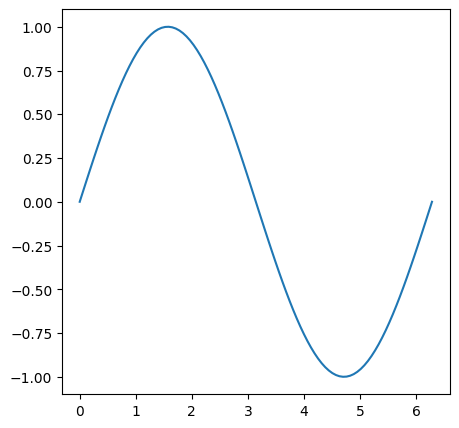

In [3]:
plt.figure(figsize=(5, 5))
plt.plot(x, y)
plt.show()

Ahora, veamos qué pasaría si parametrizamos el argumento de la función armónica con una función lineal. Esto quiere decir, qué pasa si en el argumento ponemos una expresión del tipo $a.x+b$. Vamos a ver que estos parámetros tienen un rol muy específico y por eso tienen un nombre, una interpretación, y hasta una notación que suele ser más comúnmente usada. Entonces, la función armónica quedaría:

$$
y(x) = sin(f.x+\phi)
$$

Donde $\phi$ es la fase, y $f$ la frecuencia.

## Frecuencia

Veamos el efecto de $f$

In [4]:
f = 2
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(f*x)

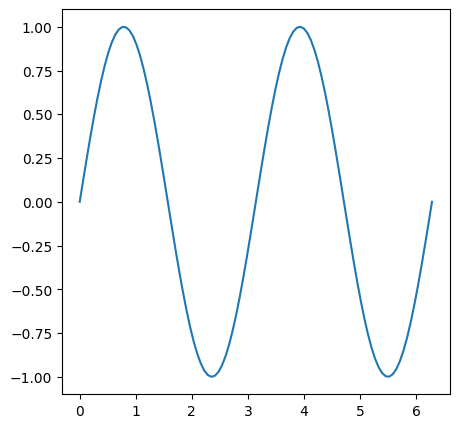

In [5]:
plt.figure(figsize=(5, 5))
plt.plot(x, y)
plt.show()

La frecuencia es la cantidad de ciclos u oscilaciones que una función realiza por unidad de tiempo o espacio. Entonces, si duplicamos la frecuencia, esto quiere decir que ahora entran 2 períodos en el mismo rango que en el que antes entraba 1 sólo período.

Probemos de graficar al mismo tiempo, funciones armónicas de distintas frecuencias que sean múltiplos entre sí.

In [6]:
f1 = 2
f2 = 3
x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(f1*x)
y2 = np.sin(f2*x)

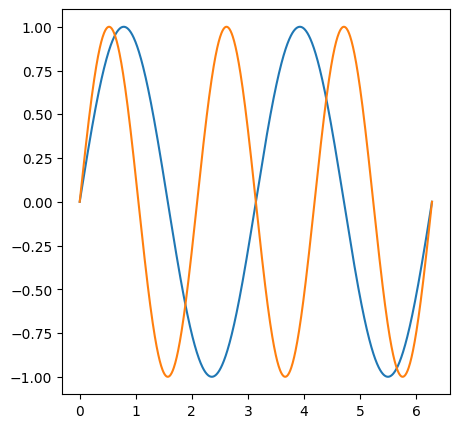

In [7]:
plt.figure(figsize=(5, 5))
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

In [8]:
f3 = 6
y3 = np.sin(f3*x)

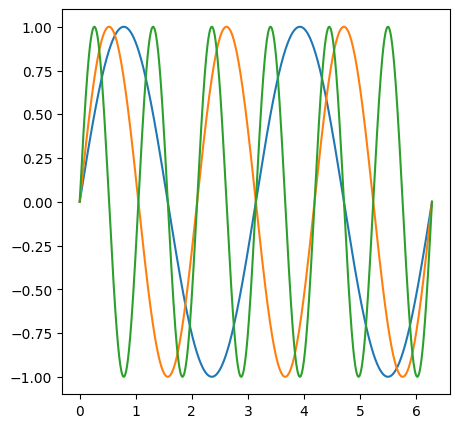

In [9]:
plt.figure(figsize=(5, 5))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.show()

## Fase

De la misma manera, podemos ver el efecto de $\phi$. Qué esperamos que haga?

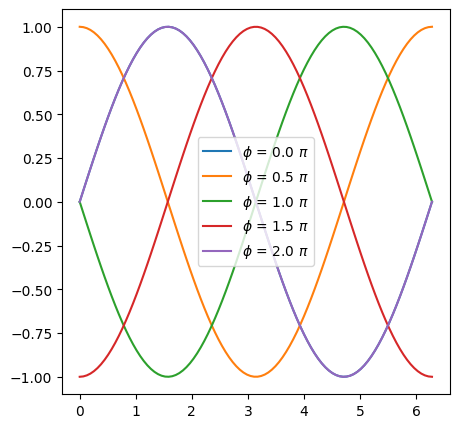

In [10]:
phis = np.linspace(0, 2*np.pi, 5)
x = np.linspace(0, 2*np.pi, 100)
plt.figure(figsize=(5, 5))
for phi in phis:
    y = np.sin(x+phi)
    plt.plot(x, y, label=f"$\phi$ = {phi/np.pi} $\pi$")
plt.legend()
plt.show()

Como era de esperarse, la fase me agrega un corrimiento en $x$. Es decir, que el período sigue siendo el mismo, pero la función empieza en otro lado. En particular, noten que la función seno corrida en $\pi/2$ es igual al coseno.

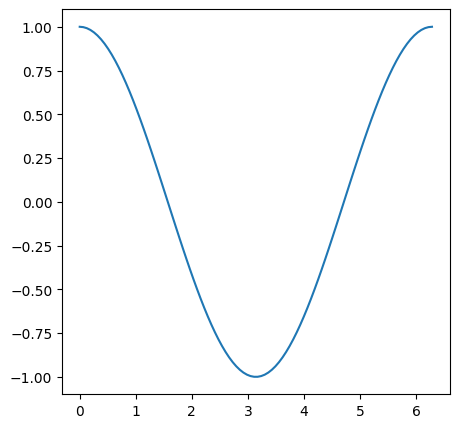

In [11]:
plt.figure(figsize=(5, 5))
plt.plot(x, np.cos(x))
plt.show()

---
# Composición de funciones armónicas

Para aproximarnos a las series de Fourier, vamos a ver la composición de funciones armónicas a partir de su suma.

En un principio, vamos a sumar dos funciones armónicas con una de frecuencia del doble que la otra. Esto quiere decir que el período es la mitad. El período de la suma, es decir, cuándo se repite la forma de la composición, va a quedar definido por el período más largo.

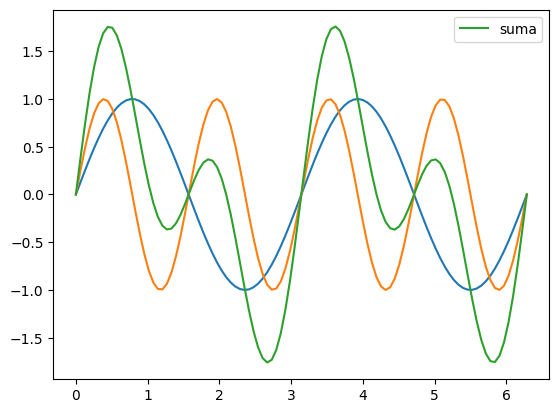

In [12]:
freqs = [2, 4]
ys = np.empty((len(freqs), len(x)))
for f in np.arange(len(freqs)):
    y = np.sin(freqs[f]*x)
    plt.plot(x, y)
    ys[f] = y
y_sum = np.sum(ys, axis=0)
plt.plot(x, y_sum, label='suma')
plt.legend()
plt.show()

Ahora vamos a sumar varias funciones armónicas con mpultiplos impares de la frecuencia fundamental. Noten que además aplicamos un factor de reducción de la amplitud de las señales que vamos adicionando. Qué tipo de forma adquiere la composición?

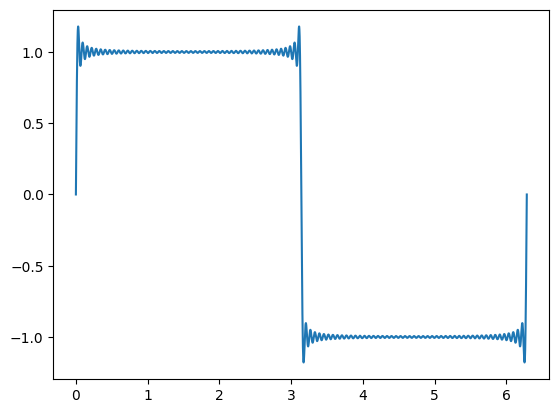

In [22]:
Nf = 100
freqs = np.arange(1, Nf, 2)
x = np.linspace(0, 2*np.pi, 10000)
ys = np.empty((len(freqs), len(x)))
for f in np.arange(len(freqs)):
    y = 4/(np.pi*(freqs[f]))*np.sin(freqs[f]*x)
    # plt.plot(x, y)
    ys[f] = y
y_sum = np.sum(ys, axis=0)
plt.plot(x, y_sum)
plt.show()

Y qué pasa si usamos los múltiplos pares? Qué forma se obtiene?

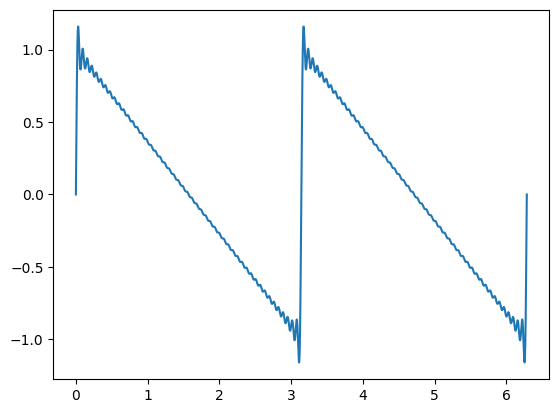

In [23]:
Nf = 100
freqs = np.arange(2, Nf, 2)
x = np.linspace(0, 2*np.pi, 10000)
ys = np.empty((len(freqs), len(x)))
for f in np.arange(len(freqs)):
    y = 4/(np.pi*(freqs[f]))*np.sin(freqs[f]*x)
    # plt.plot(x, y)
    ys[f] = y
y_sum = np.sum(ys, axis=0)
plt.plot(x, y_sum)
plt.show()

Estos ejemplos son una buena primera aproximación de cómo funciones periódicas se pueden descomponer en una suma de funciones armónicas, es decir una serie, teniendo en consideración ciertas propiedades de las frecuencias y amplitudes.

---
# Audio

Un ejemplo que conocemos mucho de señal que oscila periódicamente es el sonido. Vamos a ver cómo generar y escuchar audios en Python a partir de funciones armónicas, así como también a observar algunas propiedades acústicas.

In [24]:
from IPython.display import Audio
from scipy.io.wavfile import write

In [25]:
# Función para generar una onda sinusoidal
def generar_sinusoidal(frecuencia, duracion, fs=44100):
    t = np.linspace(0, duracion, int(fs*duracion), endpoint=False)
    onda = np.sin(2 * np.pi * frecuencia * t)
    return onda, fs

# Función para reproducir el sonido en Python usando IPython.display
def reproducir_onda(onda, fs):
    # Guardamos la onda en un archivo temporal
    write("sonido.wav", fs, np.int16(onda * 32767))
    return Audio("sonido.wav")

## Notas

La nota, o altura, va a estar definida por la frecuencia de oscilación de la onda de sonido.

In [40]:
# Parámetros de ejemplo
frecuencia = 440  # Frecuencia en Hz (La estándar)
duracion = 2.0  # Duración en segundos

# Generar la onda
onda, fs = generar_sinusoidal(frecuencia, duracion)

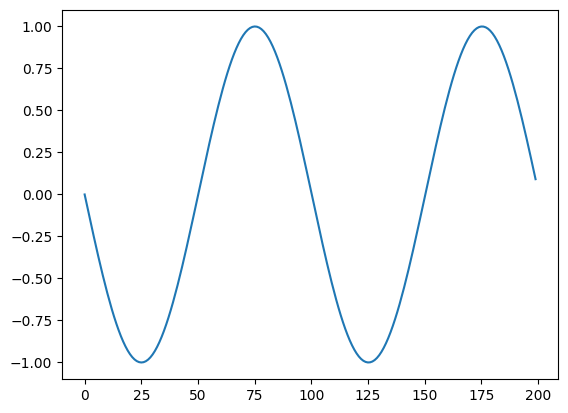

In [46]:
plt.plot(-onda[:200])

In [52]:
# Reproducir la onda en Jupyter
reproducir_onda(onda, fs)

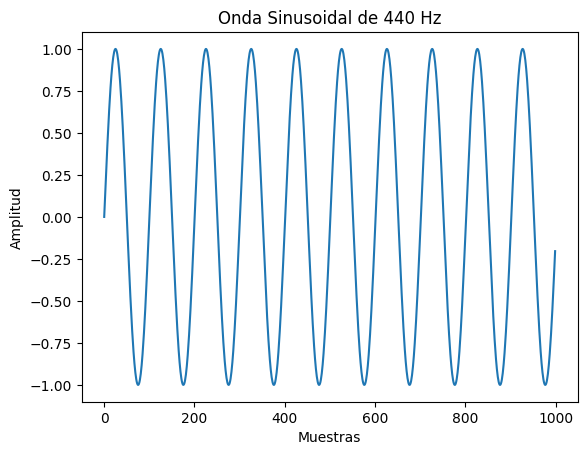

In [53]:
# Graficar la onda
plt.plot(onda[:1000])  # Graficamos los primeros 1000 puntos
plt.title(f"Onda Sinusoidal de {frecuencia} Hz")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.show()

### Ejercicio 1

El oído humano puede percibir frecuencias aproximadamente desde los 20Hz hasta los 20kHz. Este espectro se divide usualmente en octavas que siguen una escala logarítmica (la primera octava va aproximadamente de 16 a 32Hz, la segunda de 32 a 64, etc.). Los sonidos más nítidos se encuentran en la zona media, en las octavas quinta, sexta y séptima, en el rango de 200 - 2000Hz. La capacidad de oir los extremos del espectro (primera y undécima octavas) varía de persona en persona.

Experimentar generando señales (y escuchándolas) con distintas frecuencias, en la zona media y en los extremos del espectro (**cuidado con el volumen y sus oídos!!**).

In [ ]:
frecuencia = 16
duracion = 1
onda = np.array([])

while frecuencia < 20000:
    onda = np.concatenate((onda, generar_sinusoidal(frecuencia, duracion)[0]))
    frecuencia = frecuencia * 2

reproducir_onda(onda, fs)

## Armonías

En música, la armonía se refiere a la combinación de notas tocadas simultáneamente, creando un sonido que puede ser consonante (estable y agradable) o disonante (tenso e inestable). Las notas en armonía tienen frecuencias relacionadas de manera que forman proporciones simples, como 2:1 (octava), 3:2 (quinta perfecta) o 4:3 (cuarta perfecta), lo que se percibe como consonancia.

En términos matemáticos, estar en consonancia significa que las ondas de sonido de esas notas tienen frecuencias con relaciones proporcionales simples. Estas relaciones permiten que las ondas se superpongan de manera regular, con sus máximos y mínimos alineándose en patrones repetitivos. Esto minimiza la interferencia destructiva entre las ondas y genera una sensación de estabilidad en el sonido. Por ejemplo, en la quinta perfecta, la relación 3:2 indica que por cada 3 ciclos de la nota superior, la inferior completa 2 ciclos, creando una interferencia constructiva periódica que resulta en un sonido consonante.

In [85]:
# Generar dos ondas con una quinta perfecta (frecuencia2 = 3/2 * frecuencia1)
frecuencia1 = 440  # La estándar
frecuencia2 = frecuencia1 * 3/2  # Quinta perfecta

# Generar las ondas
onda1, fs = generar_sinusoidal(frecuencia1, duracion)
onda2, fs = generar_sinusoidal(frecuencia2, duracion)

# Sumar las ondas para generar armonías
onda_armonia = onda1 + onda2

# Reproducir la armonía
reproducir_onda(onda_armonia, fs)

### Ejercicio 2

Generar una señal que superponga varias frecuencias. Por ejemplo: una combinación lineal de las notas C\#4 (277.183 Hz), E4 (329.628 Hz), A4 (440 Hz), que correspondería al acorde de LA mayor. Escuchar. Graficar dos o tres períodos de la onda. Es fácil deducir a simple vista qué frecuencias componen la señal resultante?

In [89]:
frecuencia1 = 440  
frecuencia2 = 277.183
frecuencia3 = 329.628


# Generar las ondas
onda1, fs = generar_sinusoidal(frecuencia1, duracion)
onda2, fs = generar_sinusoidal(frecuencia2, duracion)
onda3, fs = generar_sinusoidal(frecuencia3, duracion)

# Sumar las ondas para generar armonías
onda_armonia = onda1 + onda2 + onda3

# Reproducir la armonía
reproducir_onda(onda_armonia, fs)

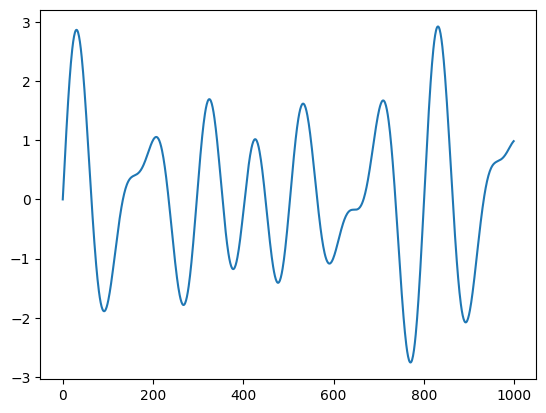

In [ ]:
plt.plot(onda_armonia[:1000])

## Batidos

Qué pasa si sumamos funciones armónicas con frecuencias muy cercanas entre sí?

In [100]:
# Generar dos ondas con frecuencias cercanas
frecuencia1 = 440  # La estándar
frecuencia2 = 442  # Frecuencia cercana (batido)

# Generar las ondas
onda1, fs = generar_sinusoidal(frecuencia1, duracion)
onda2, fs = generar_sinusoidal(frecuencia2, duracion)

# Sumar las ondas para generar batidos
onda_batido = onda1 + onda2

# Reproducir los batidos
reproducir_onda(onda_batido, fs)

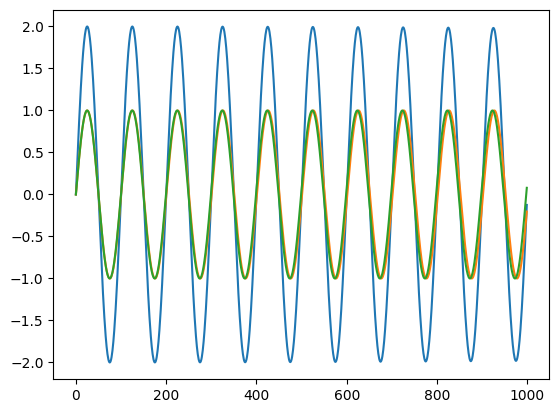

In [106]:
plt.plot(onda_batido[:1000])    
plt.plot(onda1[:1000])
plt.plot(onda2[:1000])

El fenómeno de batido ocurre cuando se superponen dos ondas de frecuencias ligeramente diferentes. La interferencia entre ambas produce una oscilación modulada, donde se observa una variación en la amplitud con una frecuencia baja (la frecuencia del batido) y una frecuencia rápida que corresponde al promedio de las frecuencias originales.

Matemáticamente, se describe sumando dos senos de frecuencias cercanas:

$$
\sin(\omega_1 t) + \sin(\omega_2 t) = 2 \cos\left( \frac{\omega_1 - \omega_2}{2} t \right) \sin\left( \frac{\omega_1 + \omega_2}{2} t \right)
$$

Aquí, $\frac{\omega_1 - \omega_2}{2}$ es la frecuencia de batido, responsable de la modulación de la amplitud.

Veamos la forma de la onda

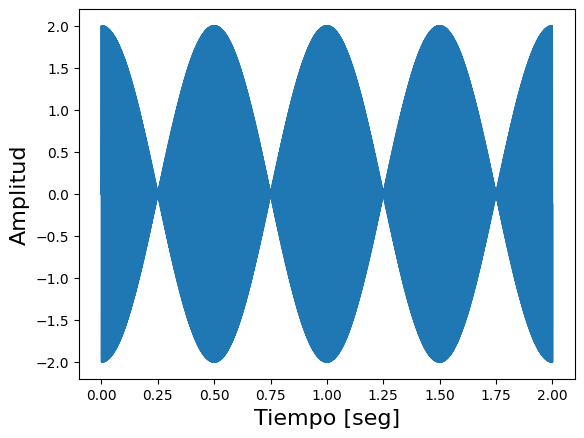

In [107]:
# Graficar la onda
t = np.linspace(0, duracion, int(fs*duracion), endpoint=False)
plt.plot(t, onda_batido)  # Graficamos los primeros 1000 puntos
plt.xlabel("Tiempo [seg]", fontsize=16)
plt.ylabel("Amplitud", fontsize=16)
plt.show()

## Timbre

El timbre, a menudo descrito como el "color" o "carácter" del sonido, se refiere a las cualidades que permiten distinguir diferentes fuentes sonoras, incluso cuando tocan la misma nota y a la misma intensidad. Este fenómeno se debe a la combinación de las frecuencias fundamentales y las armonías (o sobretonos) presentes en el sonido.

Matemáticamente, el timbre se puede entender en términos de la composición espectral de una onda sonora. Un instrumento musical produce no solo la frecuencia fundamental, sino también una serie de armónicos, que son múltiplos enteros de esta frecuencia. La amplitud y la fase de estos armónicos determinan el timbre del sonido. Por ejemplo, un piano y un violín que tocan la misma nota tendrán un timbre diferente porque generan diferentes patrones de sobretonos, resultando en percepciones auditivas distintivas.

Por ejemplo, una onda cuadrada va a ser una composición de funciones armónicas, por lo que además de tener una frecuencia fundamental, va a tener un montón de armónicos.

In [108]:
# Generar onda cuadrada
Nf = 1000
frecuencia = 1
frecuencias = np.arange(frecuencia, Nf*frecuencia, 2*frecuencia)
onda_cuadrada = np.empty(())
for f in frecuencias:
    onda, fs = generar_sinusoidal(f, duracion)
    amplitud = 4/(np.pi*f)
    onda_cuadrada = onda_cuadrada + amplitud*onda
# Reproducir la armonía
reproducir_onda(onda_cuadrada, fs)

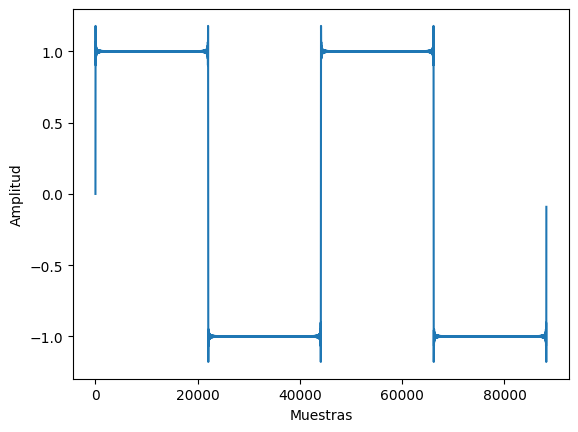

In [109]:
plt.plot(onda_cuadrada)
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.show()

Tanto en el audio como en el gráfico de la onda, se observa un fenómeno particular en las transiciones. Este fenómeno se conoce como overshooting (o sobreimpulso). En una onda cuadrada generada a partir de una serie de Fourier truncada, se refiere al fenómeno en el que la amplitud de la onda excede el valor máximo esperado en los puntos de transición, es decir, en los bordes de la onda cuadrada. Esto ocurre debido a la naturaleza de las series de Fourier, que, al truncarse (es decir, al considerar solo un número limitado de términos), no puede representar perfectamente las discontinuidades de la forma de onda cuadrada.

---
# Series de Fourier

Una serie de Fourier se define como una expansión de una función o representación de una función en una serie de senos y cosenos, tal que

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n cos(nx) + \sum_{n=1}^{\infty} b_n sin(nx)
$$

Donde los coeficientes están relacionados con la función periódica f(x) mediante integrales definidas:

$$
a_n = \frac{1}{\pi} \int_{0}^{2\pi} f(x) cos(nx) dx \\
b_n = \frac{1}{\pi} \int_{0}^{2\pi} f(x) sin(nx) dx
$$

Entonces, vemos que para calcular los coefientes es necesario calcular integrales definidas, para lo cual usaremos la regla del trapecio compuesta.


## Regla del trapecio compuesta

La regla del trapecio compuesta es un método numérico utilizado para aproximar la integral de una función. Consiste en dividir el intervalo de integración en $n$ subintervalos de igual longitud y aplicar la regla del trapecio a cada uno de esos subintervalos. La fórmula general se expresa de la siguiente manera:

Dividir el intervalo $[a, b]$ en $n$ subintervalos de igual longitud $h$:

$$
h = \frac{b - a}{n}
$$

Los puntos de división son $x_0, x_1, \ldots, x_n$, donde $x_0 = a$ y $x_n = b$.

Aplicar la regla del trapecio a cada subintervalo:

$$
\int_a^b f(x) \, dx \approx \frac{h}{2} \left( f(x_0) + 2\sum_{i=1}^{n-1} f(x_i) + f(x_n) \right)
$$

En esta fórmula, $f(x_0)$ y $f(x_n)$ son los valores de la función en los extremos del intervalo, y $2\sum_{i=1}^{n-1} f(x_i)$ representa el doble de la suma de los valores de la función en los puntos internos. Esta aproximación es generalmente más precisa que la regla del trapecio simple, ya que considera múltiples subintervalos y promedia mejor la función a lo largo del intervalo de integración.


Vamos a implementar una función que estime una integral a través de una regla de trapecios compuesta. Debe recibir la función a integrar, el intervalo de integración y el número de intervalos de la partición. Después vamos a probar esta función integrando el seno de $x$ entre $0$ y $\pi$.

In [110]:
def trapezoidal_rule(f, a, b, n):
    # Calcular la longitud del subintervalo
    h = (b - a) / n
    # Calcular los puntos de evaluación
    x = np.linspace(a, b, n + 1)
    # Calcular los valores de la función en los puntos
    y = f(x)
    # Aplicar la regla del trapecio compuesta
    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:n]) + y[n])
    return integral

In [135]:
# Ejemplo de uso
f = lambda x: np.sin(x)  # Definir la función a integrar
a = 0                     # Límite inferior
b = np.pi                 # Límite superior
n = 1000                   # Número de subintervalos

resultado = trapezoidal_rule(f, a, b, n)
print(f'La integral aproximada es: {resultado}')

La integral aproximada es: 1.9999983550656628


### Ejercicio 3

Esta función también está implementada en Numpy, usando `np.trapz`. Calcule la misma integral que antes y compare.



In [148]:
np.trapz(f(np.linspace(a, b, n + 1)), np.linspace(a, b, n + 1))

1.9999983550656628

## Cálculo de coeficientes

### Ejercicio 4

Implementar una función que compute mediante integración numérica, usando `np.trapz`, estos coeficientes hasta un cierto $N$ y devuelva la función que corresponde a la serie truncada.

In [239]:
def coeficientes(f, N, L=np.pi):
    a = np.zeros(N+1)
    b = np.zeros(N+1)
    
    xs = np.linspace(-L, L, 1000)
    for n in range(0, N+1):
        a[n] = 1/L*np.trapz(f(xs)*np.cos(n*np.pi/L*xs), xs)
        b[n] = 1/L*np.trapz(f(xs)*np.sin(n*np.pi/L*xs), xs)
       
    def trunc(x):
        suma = np.zeros_like(x)
        for n in range(0, N+1):
            if n == 0:
                suma += a[n]/2
            else:
                suma += a[n]*np.cos(n*x) + b[n]*np.sin(n*x)
        return suma
        
    return trunc, a, b

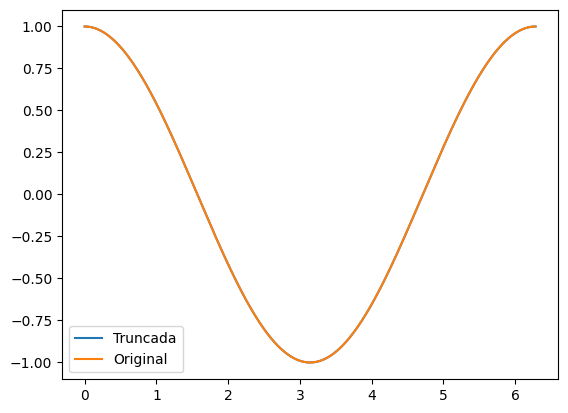

In [240]:
cos_, a, b = coeficientes(np.cos, 10)

x = np.linspace(0, 2*np.pi, 1000)
plt.plot(x, cos_(x), label='Truncada')
plt.plot(x, np.cos(x), label='Original')
plt.legend()

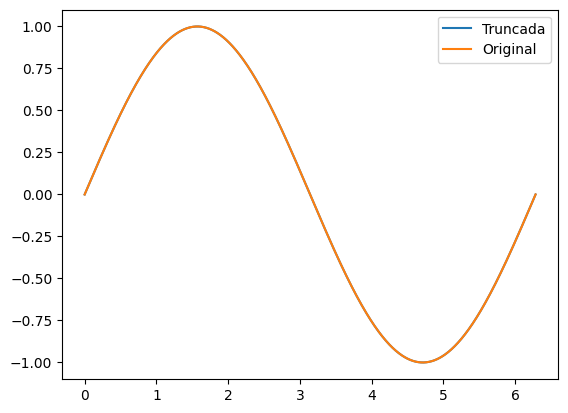

In [241]:
sin_, a, b = coeficientes(np.sin, 10)

x = np.linspace(0, 2*np.pi, 1000)
plt.plot(x, sin_(x), label='Truncada')
plt.plot(x, np.sin(x), label='Original')
plt.legend()


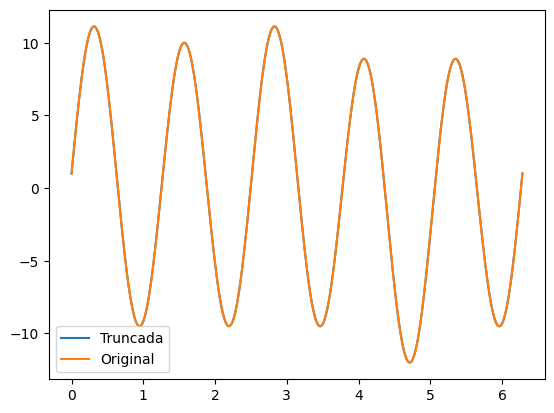

In [242]:
def f(x):
    return np.sin(x) + np.cos(2*x) + 10*np.sin(5*x)

f_, a, b = coeficientes(f, 5)

x = np.linspace(0, 2*np.pi, 1000)
plt.plot(x, f_(x), label='Truncada')
plt.plot(x, f(x), label='Original')
plt.legend()


### Ejercicio 5

Utilizando el ejercicio anterior, calcular aproximaciones por funciones armónicas de la función $f(x) = x^4$. Graficar $f$ y sus aproximaciones sucesivas.

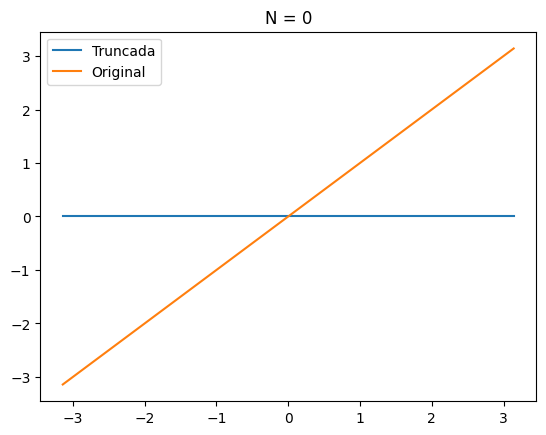

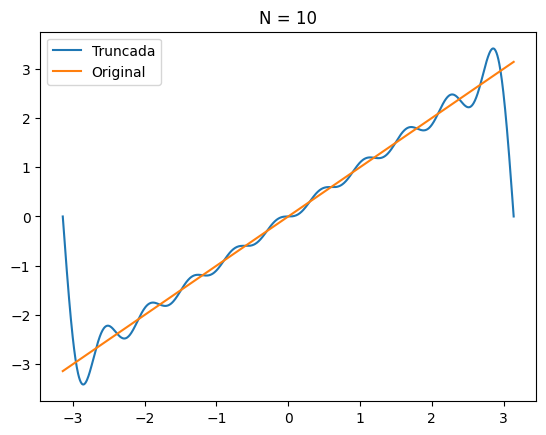

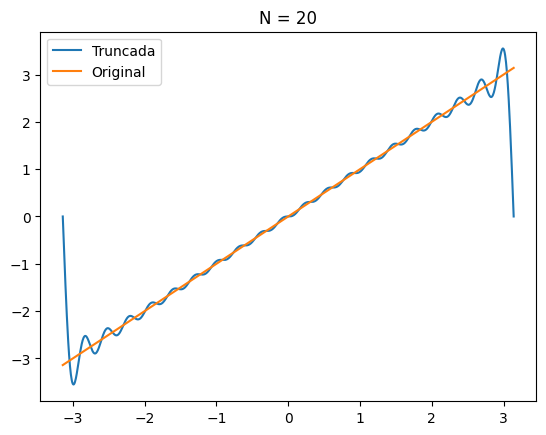

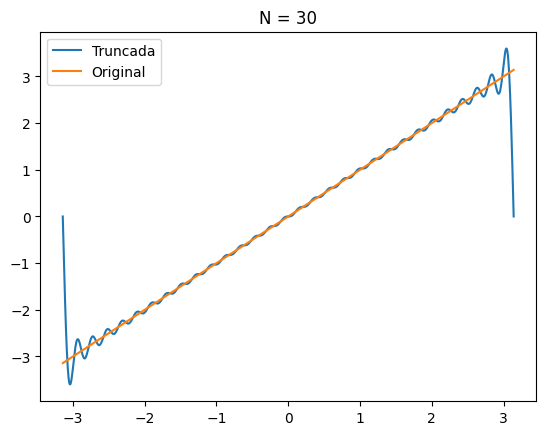

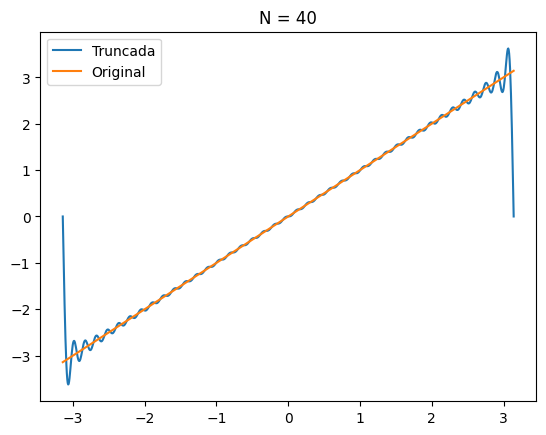

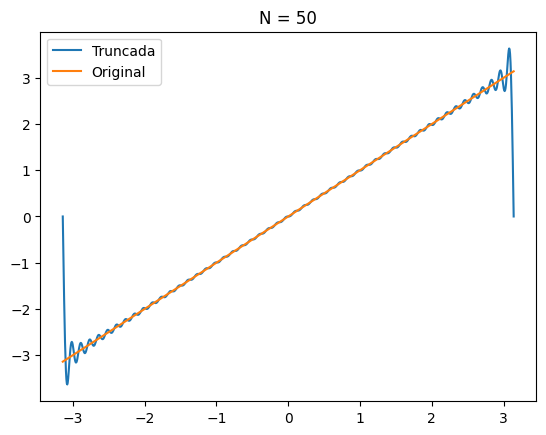

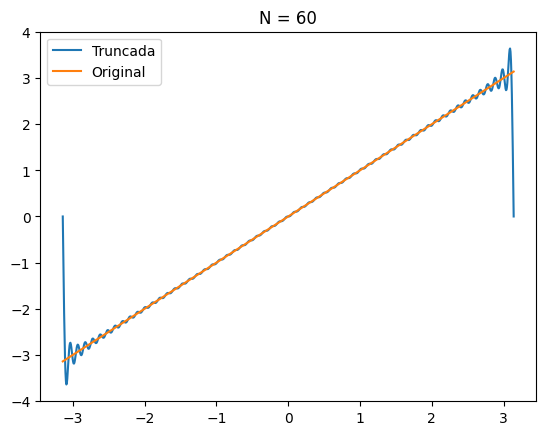

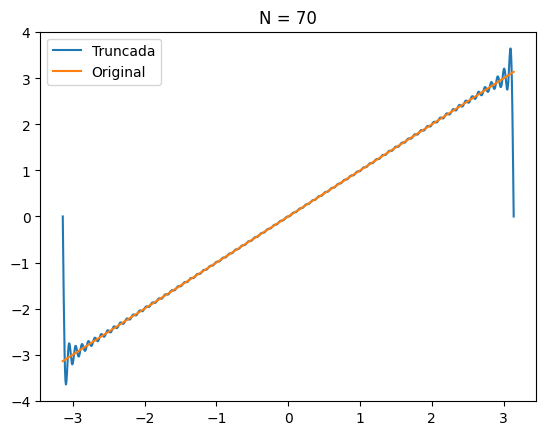

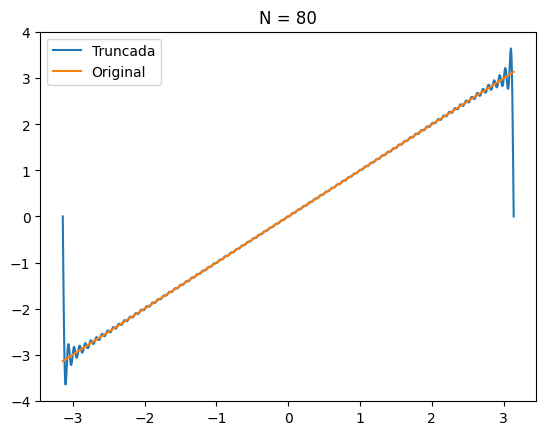

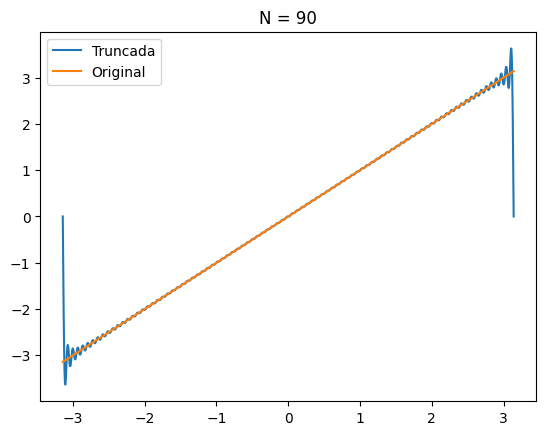

In [244]:
def f(x):
    return x

for n in range(0, 100, 10):
    f_, a, b = coeficientes(f, n)

    x = np.linspace(-np.pi, np.pi, 1000)
    plt.plot(x, f_(x), label='Truncada')
    plt.plot(x, f(x), label='Original')
    plt.legend()
    plt.title(f'N = {n}')   
    plt.show()

# Promedio de una función periódica

La integral de una función periódica se puede utilizar para calcular su promedio en un intervalo completo de su período. La idea es que el promedio de una función periódica sobre un período completo es igual a la integral de la función dividida por la longitud del período.

Para una función periódica $f(x)$ con período $T$, el promedio $\bar{f}$ se puede calcular como:

$$
\bar{f} = \frac{1}{T} \int_0^T f(x) dx
$$

Por ejemplo, para la función $f(x) = \sin(x)$, con período $T = 2\pi$,

$$
\bar{f} = \frac{1}{2\pi} \int_0^{2\pi} \sin(x) dx = 0
$$

Que es efectivamente lo que vale el promedio, ya que la función seno tiene igual área positiva y negativa en un período completo.


## Ejercicio 6

6.1. Calcular la integral de la función $f(x)=(sin(x))^2$ en un período.
6.2. Comparar con el promedio obtenido de evaluar en un conjunto de valores.
6.3. Qué pasa si ahora integramos en 2 veces el período? Observe que calcular la media en un período es igual a calcular la media en más períodos.

In [245]:
xs = np.linspace(0, 2*np.pi, 1000)
ys = np.sin(xs)**2

np.trapz(ys, xs) / (2*np.pi)

0.5

# Paridad de funciones

La paridad de funciones se refiere a la simetría de una función con respecto al origen o al eje vertical. Una función $f(x)$ es **par** si cumple $f(x) = f(-x)$ para todo $x$, lo que significa que su gráfica es simétrica respecto al eje $y$. En cambio, es **impar** si satisface $f(x) = -f(-x)$, lo que implica que su gráfica es simétrica respecto al origen.

Para calcular los coeficientes de Fourier de una función, si sabemos que es par, sólo necesitaremos los coeficientes $a_n$ (coseno), ya que todos los coeficientes $b_n$ (seno) serán cero.

Por ejemplo, para una función par como $f(x) = x^2$ en el intervalo $[-L, L]$, los coeficientes de Fourier se calculan como:

$$
a_0 = \frac{1}{2L} \int_{-L}^{L} f(x) dx, \quad a_n = \frac{1}{L} \int_{-L}^{L} f(x) \cos\left(\frac{n \pi x}{L}\right) dx
$$

donde $b_n = 0$ para todo $n$. Esto simplifica el cálculo de la serie de Fourier al eliminar los términos de seno.

## Ejercicio 7

7.1. Para la función $f(x) = x^2$, haga el gráfico de $f(x)$ contra $f(-x)$. Qué me dice esto de la paridad de la función?

7.2. Calcule los coeficientes $b_n$ en el intervalo entre $-\pi$ y $\pi$ y muestre que efectivamente son cero.

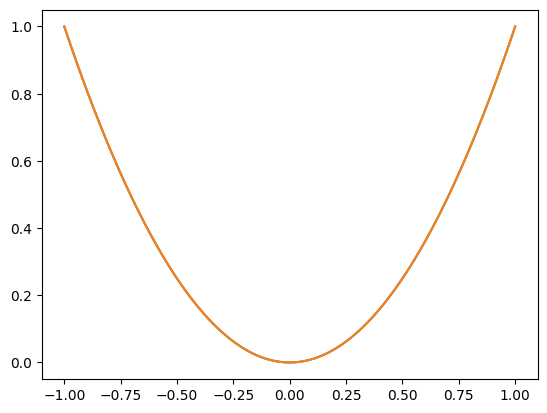

In [246]:
def f(x):
    return x**2

xs = np.linspace(-1, 1, 1000)
ys_1 = f(xs)
ys_2 = f(-xs)

plt.plot(xs, ys_1)
plt.plot(xs, ys_2)

In [248]:
f_, a , b = coeficientes(f, 10, L=1)

In [251]:
a, b

(array([ 0.666668  , -0.40528607,  0.10132252, -0.04503297,  0.02533163,
        -0.01621273,  0.01125925, -0.00827245,  0.00633391, -0.00500485,
         0.00405418]),
 array([ 0.00000000e+00, -2.77555756e-17,  0.00000000e+00,  2.77555756e-17,
         0.00000000e+00,  0.00000000e+00,  2.77555756e-17,  4.85722573e-17,
         6.93889390e-18,  1.38777878e-17, -6.93889390e-18]))

# Ortogonalidad de funciones armónicas

La ortogonalidad de los senos (o cosenos) asegura que cada frecuencia en la serie de Fourier se mantiene independiente de las demás, permitiendo descomponer cualquier función periódica en una suma de senos (y cosenos) sin interferencias entre las diferentes componentes de frecuencia.

Para $m$ y $n$ enteros positivos, las funciones seno $\sin(mx)$ y $\sin(nx)$ son ortogonales en el intervalo $[0, 2\pi]$ si $m \neq n$, lo que significa que:

$$
\int_0^{2\pi} \sin(mx) \sin(nx) dx = 0 \quad \text{si} \quad m \neq n
$$

En cambio, si $m = n$, la integral no es cero, sino que tiene un valor proporcional a $\pi$:

$$
\int_0^{2\pi} \sin^2(nx) dx = \pi
$$

El producto interno de funciones se define como

$$
\langle f, g \rangle = \int_0^{2\pi} f(x) g(x) \, dx
$$

Esto quiere decir, que las funciones armónicas de distinta frecuencia son ortogonales, ya que su producto interno es cero. Esta propiedad es necesaria para que puedan formar una base y que entonces tenga sentido el desarrollo en series de Fourier.


## Ejercicio 8

Mostrar que las funciones coseno para algún par de frecuencias distintas en particular son ortogonales.

In [255]:
def cos(n, x):
    return np.cos(n*x)

xs = np.linspace(0, 2*np.pi, 1000)
ys = cos(1, xs) * cos(3, xs)
np.trapz(ys, xs)

-2.498001805406602e-16